EXPLORATORY DATA ANALYSIS

Import and Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("/content/nigeria_houses_data.csv")

# Basic shape and info
print(df.shape)
df.info()

# Preview
df.head()


(24326, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


**Basic Stats and Null Check**

In [7]:
# Summary statistics
df.describe(include='all').T

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


,0


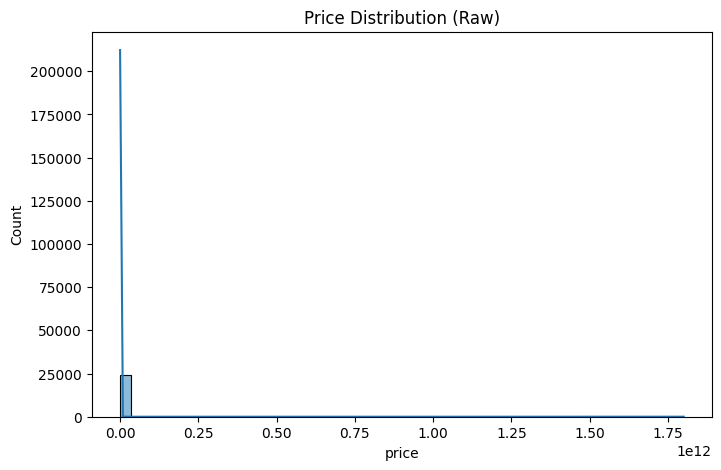

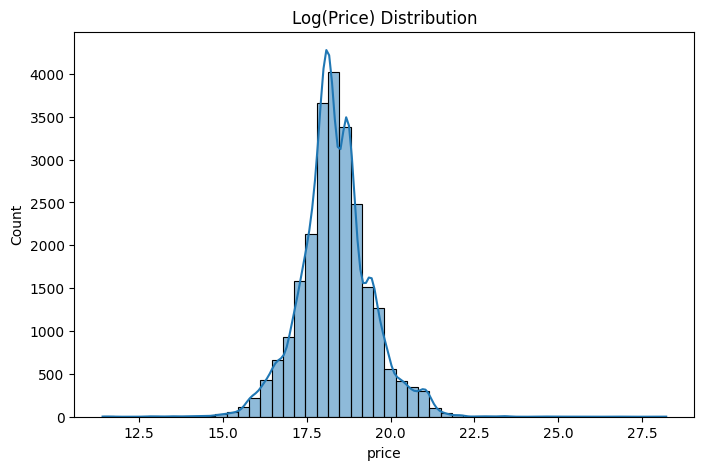

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (Raw)')
plt.show()

# Optionally log-transform
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Log(Price) Distribution')
plt.show()


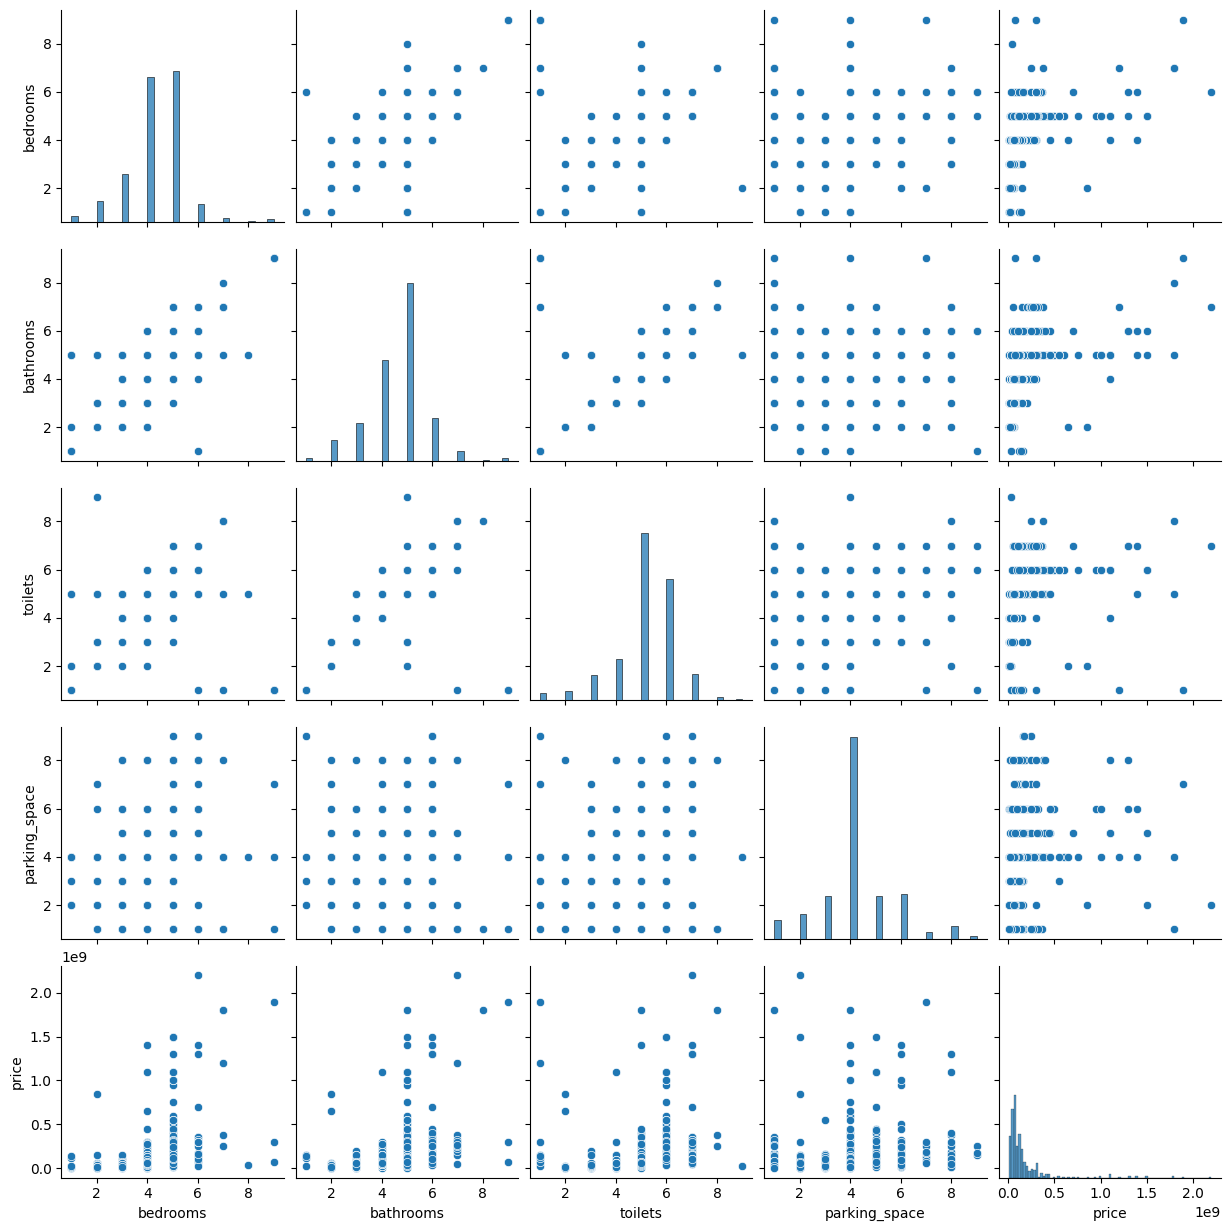

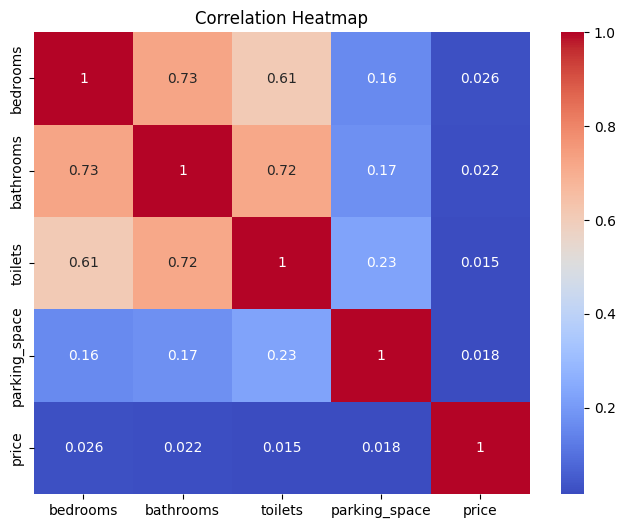

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('price')  # except target

# Pairplot for small subset
sns.pairplot(df.sample(500), vars=numeric_cols + ['price'])
plt.show()

# Correlation
corr = df[numeric_cols + ['price']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


Explore Categorical Features
Distribution of key columns:

In [10]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    print(f"\n=== {col.upper()} ===")
    print(df[col].value_counts().head(10))



=== TITLE ===
title
Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: count, dtype: int64

=== TOWN ===
town
Lekki                   10895
Ajah                     2164
Ikoyi                    1547
Ikeja                     688
Ibeju Lekki               503
Victoria Island (VI)      496
Port Harcourt             435
Ibadan                    413
Gwarinpa                  391
Magodo                    375
Name: count, dtype: int64

=== STATE ===
state
Lagos       18445
Abuja        3524
Ogun          637
Oyo           477
Rivers        444
Imo           246
Anambara      145
Enugu         128
Edo           100
Delta          63
Name: count, dtype: int64


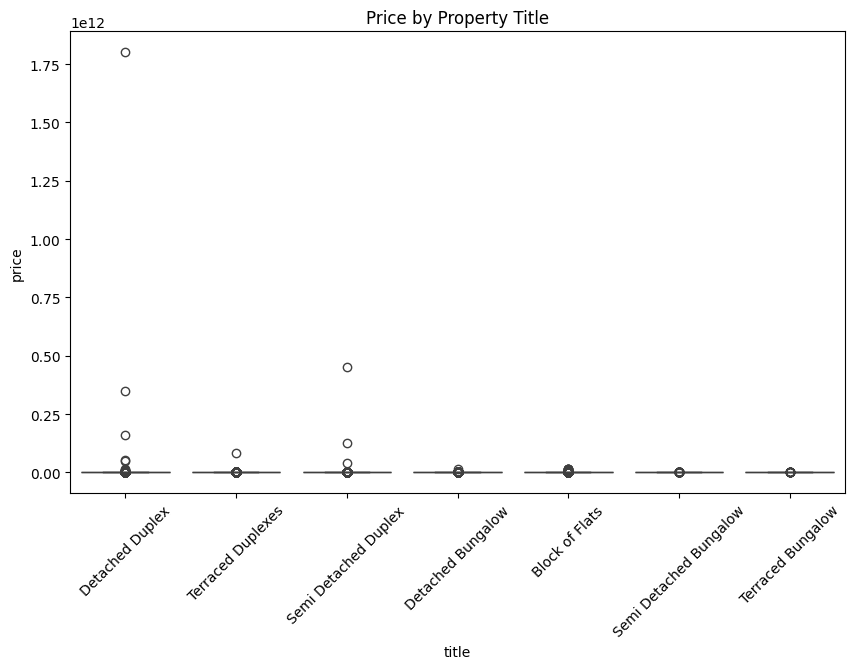

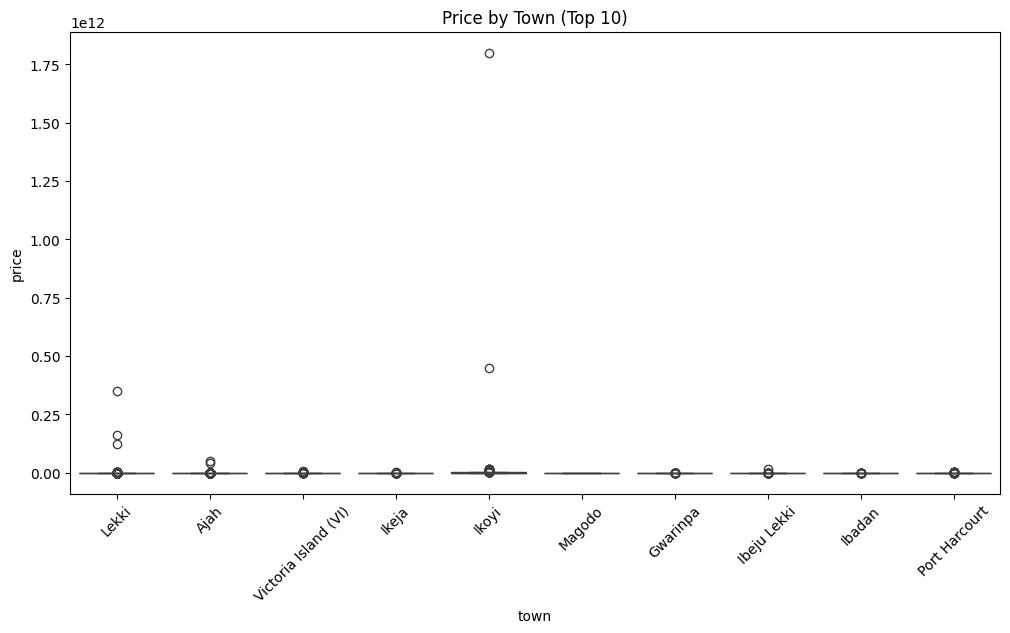

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='title', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Property Title')
plt.show()

plt.figure(figsize=(12,6))
top_towns = df['town'].value_counts().nlargest(10).index
sns.boxplot(x='town', y='price', data=df[df['town'].isin(top_towns)])
plt.xticks(rotation=45)
plt.title('Price by Town (Top 10)')
plt.show()


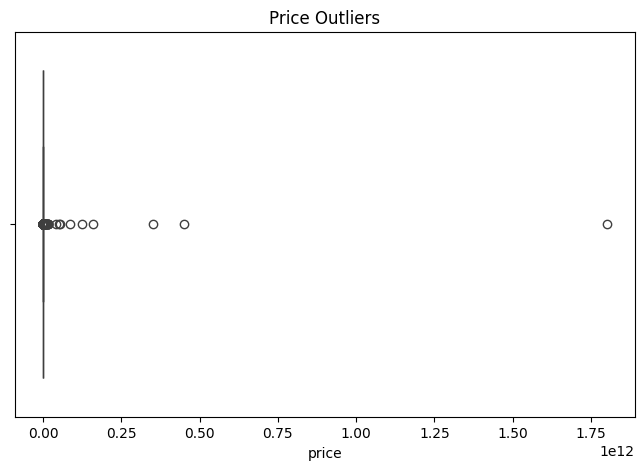

Outlier threshold: 322,000,000
                title                  town        price
0     Detached Duplex               Mabushi  450000000.0
1   Terraced Duplexes               Katampe  800000000.0
5     Detached Duplex                 Lekki  450000000.0
14    Detached Duplex  Victoria Island (VI)  450000000.0
19     Block of Flats                 Ikeja  350000000.0


In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.title('Price Outliers')
plt.show()

# Identify extreme outliers
q1, q3 = df['price'].quantile([0.25, 0.75])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
print(f"Outlier threshold: {upper:,.0f}")
print(df[df['price'] > upper][['title','town','price']].head())


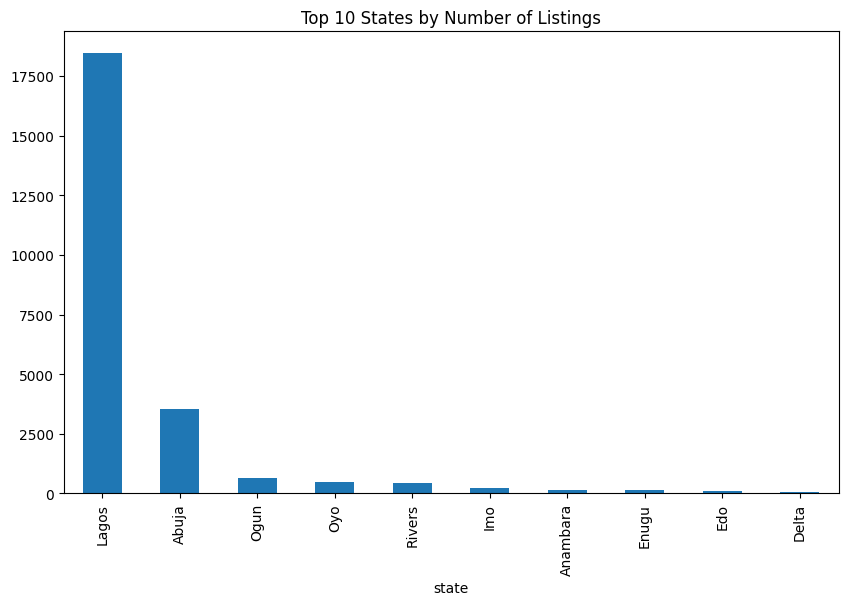

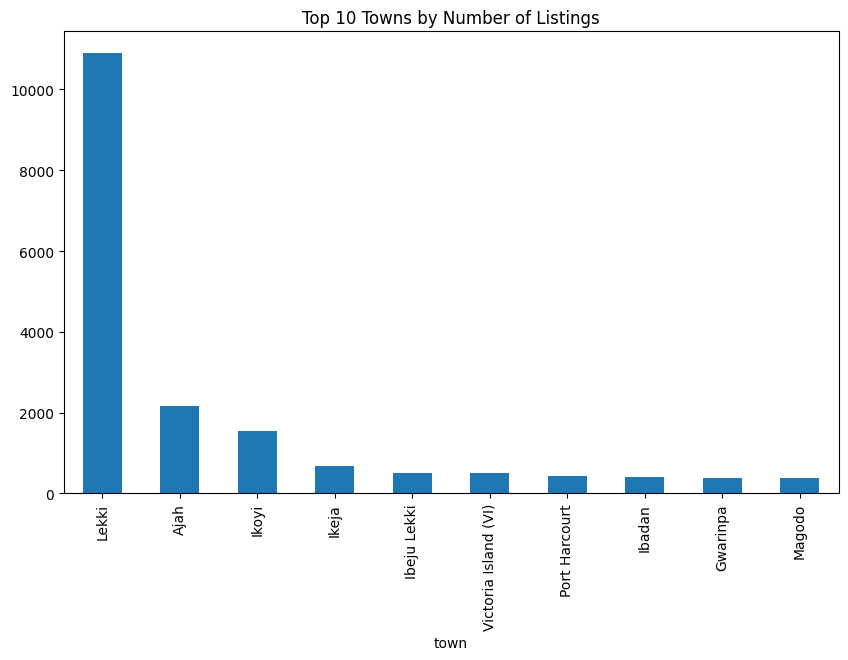

In [13]:
plt.figure(figsize=(10,6))
df['state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States by Number of Listings')
plt.show()

plt.figure(figsize=(10,6))
df['town'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Towns by Number of Listings')
plt.show()


In [14]:
grouped = df.groupby(['town', 'title'])['price'].mean().reset_index().sort_values('price', ascending=False)
grouped.head(10)


,town,title,price
283,Ikoyi,Semi Detached Duplex,2.880772e+09
281,Ikoyi,Detached Duplex,2.526967e+09
239,Ifako-Ijaiye,Detached Duplex,2.231860e+09
279,Ikoyi,Block of Flats,1.384459e+09
280,Ikoyi,Detached Bungalow,1.175000e+09
641,Wuse 2,Detached Bungalow,8.500000e+08
448,Lugbe District,Block of Flats,8.319000e+08
470,Maitama District,Detached Duplex,8.298478e+08
381,Katampe,Block of Flats,7.858333e+08
184,Guzape District,Terraced Duplexes,6.789959e+08


In [15]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
corr = df_encoded.corr()['price'].sort_values(ascending=False)
corr.head(10)


,price
price,1.000000
town_Ikoyi,0.041883
bedrooms,0.025734
bathrooms,0.021965
parking_space,0.018370
toilets,0.015486
title_Detached Duplex,0.009432
state_Lagos,0.006442
town_Maitama District,0.003457
town_Asokoro District,0.001895


PREPARING IBADAN HOUSING DATA FOR MODELING

Total dataset: 24326 properties
Ibadan properties: 413 properties
Percentage: 1.70%

IBADAN MARKET OVERVIEW

Property Types Distribution:
title
Detached Bungalow         138
Detached Duplex           134
Block of Flats             97
Semi Detached Duplex       17
Terraced Duplexes          11
Semi Detached Bungalow     10
Terraced Bungalow           6
Name: count, dtype: int64

Price Statistics (₦):
count    4.130000e+02
mean     4.300678e+07
std      4.205133e+07
min      1.400000e+06
25%      1.500000e+07
50%      3.000000e+07
75%      6.000000e+07
max      3.500000e+08
Name: price, dtype: float64

Price Range: ₦1,400,000 - ₦350,000,000


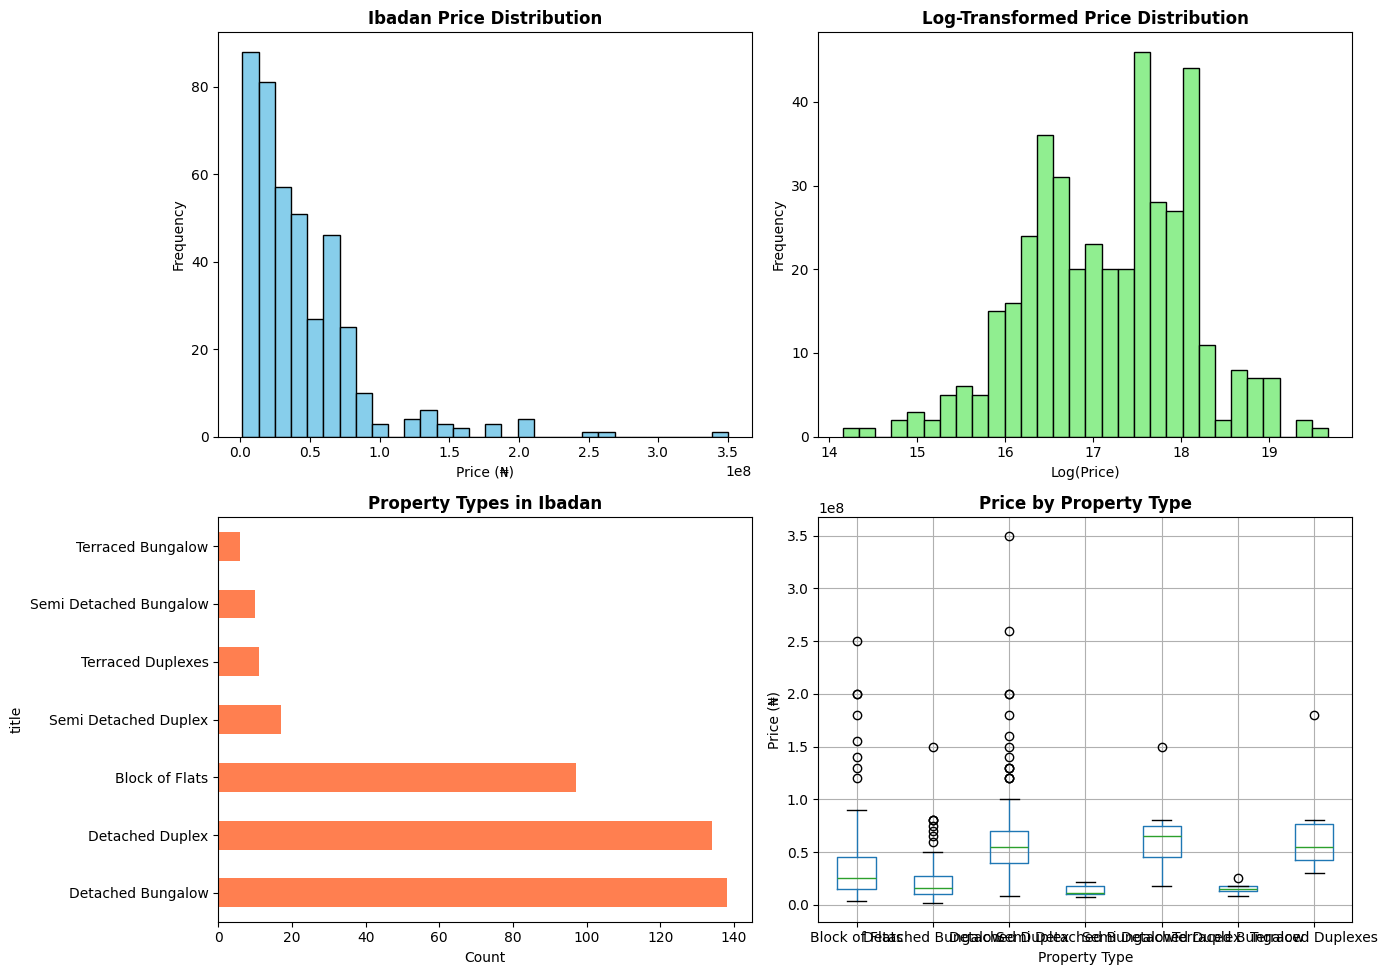


OUTLIER REMOVAL
Before: 413 properties
After: 392 properties
Removed: 21 outliers
Price range: ₦0 - ₦127,500,000

ENGINEERED FEATURES
✓ total_rooms
✓ bathroom_bedroom_ratio
✓ has_multiple_parking
✓ is_duplex
✓ is_detached

Property Type Encoding:
  Block of Flats: 0
  Detached Bungalow: 1
  Detached Duplex: 2
  Semi Detached Bungalow: 3
  Semi Detached Duplex: 4
  Terraced Bungalow: 5
  Terraced Duplexes: 6

DATASET SHAPE
Features (X): (392, 10)
Target (y): (392,)

Feature columns: 10

FEATURE CORRELATIONS WITH PRICE
is_duplex.....................  0.5671
title_encoded.................  0.2968
bedrooms......................  0.2635
total_rooms...................  0.2544
bathrooms.....................  0.2107
toilets.......................  0.1956
is_detached...................  0.0750
parking_space.................  0.0126
bathroom_bedroom_ratio........ -0.0177
has_multiple_parking.......... -0.0944

TRAIN-TEST SPLIT
Training set: 313 samples (80%)
Test set: 79 samples (20%)

✓ Featur

In [16]:
# =============================================================================
# IBADAN HOUSE PRICE PREDICTION - MODEL PREPARATION
# =============================================================================

print("=" * 60)
print("PREPARING IBADAN HOUSING DATA FOR MODELING")
print("=" * 60)

# 1. Filter for Ibadan only
df_ibadan = df[df['town'] == 'Ibadan'].copy()
print(f"\nTotal dataset: {len(df)} properties")
print(f"Ibadan properties: {len(df_ibadan)} properties")
print(f"Percentage: {len(df_ibadan)/len(df)*100:.2f}%")

# Check if we have enough data
if len(df_ibadan) < 50:
    print("\n⚠️ WARNING: Limited Ibadan data. Consider using Oyo state data instead.")
    df_ibadan = df[df['state'] == 'Oyo'].copy()
    print(f"Expanded to Oyo state: {len(df_ibadan)} properties")

# 2. Ibadan Market Analysis
print("\n" + "=" * 60)
print("IBADAN MARKET OVERVIEW")
print("=" * 60)
print("\nProperty Types Distribution:")
print(df_ibadan['title'].value_counts())
print(f"\nPrice Statistics (₦):")
print(df_ibadan['price'].describe())
print(f"\nPrice Range: ₦{df_ibadan['price'].min():,.0f} - ₦{df_ibadan['price'].max():,.0f}")

# 3. Visualize Ibadan Market
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
axes[0, 0].hist(df_ibadan['price'], bins=30, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Ibadan Price Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Price (₦)')
axes[0, 0].set_ylabel('Frequency')

# Log price distribution
axes[0, 1].hist(np.log1p(df_ibadan['price']), bins=30, edgecolor='black', color='lightgreen')
axes[0, 1].set_title('Log-Transformed Price Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Log(Price)')
axes[0, 1].set_ylabel('Frequency')

# Property types
df_ibadan['title'].value_counts().plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Property Types in Ibadan', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Count')

# Price by property type
df_ibadan.boxplot(column='price', by='title', ax=axes[1, 1])
axes[1, 1].set_title('Price by Property Type', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Property Type')
axes[1, 1].set_ylabel('Price (₦)')
plt.suptitle('')

plt.tight_layout()
plt.show()

# 4. Handle Outliers (Ibadan-specific)
q1, q3 = df_ibadan['price'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr

df_model = df_ibadan[(df_ibadan['price'] >= lower_bound) &
                      (df_ibadan['price'] <= upper_bound)].copy()

print(f"\n" + "=" * 60)
print("OUTLIER REMOVAL")
print("=" * 60)
print(f"Before: {len(df_ibadan)} properties")
print(f"After: {len(df_model)} properties")
print(f"Removed: {len(df_ibadan) - len(df_model)} outliers")
print(f"Price range: ₦{lower_bound:,.0f} - ₦{upper_bound:,.0f}")

# 5. Feature Engineering for Ibadan Market
df_model['total_rooms'] = df_model['bedrooms'] + df_model['bathrooms'] + df_model['toilets']
df_model['bathroom_bedroom_ratio'] = df_model['bathrooms'] / (df_model['bedrooms'] + 1)
df_model['has_multiple_parking'] = (df_model['parking_space'] >= 2).astype(int)
df_model['is_duplex'] = df_model['title'].str.contains('Duplex', case=False).astype(int)
df_model['is_detached'] = df_model['title'].str.contains('Detached', case=False).astype(int)

print("\n" + "=" * 60)
print("ENGINEERED FEATURES")
print("=" * 60)
print("✓ total_rooms")
print("✓ bathroom_bedroom_ratio")
print("✓ has_multiple_parking")
print("✓ is_duplex")
print("✓ is_detached")

# 6. Encode Property Title
from sklearn.preprocessing import LabelEncoder

le_title = LabelEncoder()
df_model['title_encoded'] = le_title.fit_transform(df_model['title'])

# Save label encoder mapping for future use
title_mapping = dict(zip(le_title.classes_, le_title.transform(le_title.classes_)))
print(f"\nProperty Type Encoding:")
for prop_type, code in title_mapping.items():
    print(f"  {prop_type}: {code}")

# 7. Prepare Features and Target
feature_cols = [
    'bedrooms', 'bathrooms', 'toilets', 'parking_space',
    'total_rooms', 'bathroom_bedroom_ratio', 'has_multiple_parking',
    'is_duplex', 'is_detached', 'title_encoded'
]

X = df_model[feature_cols]
y = df_model['price']

# Log transform target (reduces skewness)
y_log = np.log1p(y)

print(f"\n" + "=" * 60)
print("DATASET SHAPE")
print("=" * 60)
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nFeature columns: {len(feature_cols)}")

# 8. Check correlations
print("\n" + "=" * 60)
print("FEATURE CORRELATIONS WITH PRICE")
print("=" * 60)
correlations = X.corrwith(y).sort_values(ascending=False)
for feat, corr in correlations.items():
    print(f"{feat:.<30} {corr:>7.4f}")

# 9. Train-Test Split
from sklearn.model_selection import train_test_split

# Use 80-20 split (or 70-30 if dataset is small)
test_size = 0.2 if len(df_model) > 200 else 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=test_size, random_state=42, shuffle=True
)

print(f"\n" + "=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)
print(f"Training set: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]} samples ({test_size*100:.0f}%)")

# 10. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled using StandardScaler")

# 11. Save Processed Data
print("\n" + "=" * 60)
print("SAVING PROCESSED DATA")
print("=" * 60)

# Save full processed dataset
df_model.to_csv('ibadan_housing_processed.csv', index=False)
print("✓ ibadan_housing_processed.csv")

# Save train-test splits
np.save('X_train_ibadan.npy', X_train_scaled)
np.save('X_test_ibadan.npy', X_test_scaled)
np.save('y_train_ibadan.npy', y_train.values)
np.save('y_test_ibadan.npy', y_test.values)
print("✓ X_train_ibadan.npy")
print("✓ X_test_ibadan.npy")
print("✓ y_train_ibadan.npy")
print("✓ y_test_ibadan.npy")

# Save feature names and scaler for deployment
import pickle
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)
with open('scaler_ibadan.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoder_title.pkl', 'wb') as f:
    pickle.dump(le_title, f)
print("✓ feature_columns.pkl")
print("✓ scaler_ibadan.pkl")
print("✓ label_encoder_title.pkl")

# 12. Summary Report
print("\n" + "=" * 60)
print("DATA PREPARATION COMPLETE ✓")
print("=" * 60)
print(f"""
IBADAN HOUSING DATASET SUMMARY
--------------------------------
Total Properties: {len(df_model)}
Features: {len(feature_cols)}
Target: Price (log-transformed)

Price Statistics:
  Min: ₦{df_model['price'].min():,.0f}
  Max: ₦{df_model['price'].max():,.0f}
  Mean: ₦{df_model['price'].mean():,.0f}
  Median: ₦{df_model['price'].median():,.0f}

Ready for Model Training!
Next step: Run model_training_ibadan.ipynb
""")

# 13. Create a sample prediction function (for testing)
def preview_prediction_format():
    """Show what input data should look like for predictions"""
    sample_input = pd.DataFrame({
        'bedrooms': [4],
        'bathrooms': [3],
        'toilets': [4],
        'parking_space': [2],
        'title': ['Detached Duplex']
    })
    print("\n" + "=" * 60)
    print("SAMPLE INPUT FORMAT FOR PREDICTIONS")
    print("=" * 60)
    print(sample_input.to_string(index=False))
    print("\nThis will predict price for a 4-bedroom Detached Duplex in Ibadan")

preview_prediction_format()

In [17]:
# =============================================================================
# IBADAN HOUSE PRICE PREDICTION - PRODUCTION-GRADE ML PIPELINE
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib
import json

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURATION & SETUP
# =============================================================================

class Config:
    """Centralized configuration for reproducibility"""
    RANDOM_STATE = 42
    TEST_SIZE = 0.15
    VAL_SIZE = 0.15  # From remaining data after test split
    CV_FOLDS = 5
    N_JOBS = -1

    # Model selection criteria
    PRIMARY_METRIC = 'r2'
    SECONDARY_METRIC = 'mae'

    # Business thresholds
    MIN_ACCEPTABLE_R2 = 0.75
    MAX_ACCEPTABLE_MAPE = 20.0  # 20% error

    # Experiment tracking
    EXPERIMENT_NAME = f"ibadan_housing_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
    MODEL_DIR = 'models'
    RESULTS_DIR = 'results'

config = Config()

print("=" * 80)
print(f"🚀 PRODUCTION ML PIPELINE: {config.EXPERIMENT_NAME}")
print("=" * 80)

# =============================================================================
# 1. DATA LOADING WITH VALIDATION
# =============================================================================

def load_and_validate_data():
    """Load data with integrity checks"""
    print("\n📁 Loading Ibadan housing data...")

    try:
        df = pd.read_csv('ibadan_housing_processed.csv')

        # Data validation
        assert len(df) > 50, "Insufficient data samples"
        assert not df.isnull().any().any(), "Missing values detected"
        assert (df['price'] > 0).all(), "Invalid price values"

        print(f"✓ Loaded {len(df)} valid samples")
        return df

    except FileNotFoundError:
        print("❌ Error: Run EDA preprocessing first")
        raise
    except AssertionError as e:
        print(f"❌ Data validation failed: {e}")
        raise

df = load_and_validate_data()

# =============================================================================
# 2. FEATURE ENGINEERING (REPRODUCIBLE)
# =============================================================================

def engineer_features(df):
    """Create features with clear documentation"""
    df = df.copy()

    # Basic aggregations
    df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['toilets']
    df['bathroom_bedroom_ratio'] = df['bathrooms'] / (df['bedrooms'] + 1)

    # Binary flags
    df['has_multiple_parking'] = (df['parking_space'] >= 2).astype(int)
    df['is_duplex'] = df['title'].str.contains('Duplex', case=False, na=False).astype(int)
    df['is_detached'] = df['title'].str.contains('Detached', case=False, na=False).astype(int)

    # Encode property title
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['title_encoded'] = le.fit_transform(df['title'])

    # Save encoder for deployment
    joblib.dump(le, f'{config.MODEL_DIR}/label_encoder.pkl')

    return df, le

df_features, label_encoder = engineer_features(df)

# Define feature columns
FEATURE_COLS = [
    'bedrooms', 'bathrooms', 'toilets', 'parking_space',
    'total_rooms', 'bathroom_bedroom_ratio', 'has_multiple_parking',
    'is_duplex', 'is_detached', 'title_encoded'
]

X = df_features[FEATURE_COLS]
y = np.log1p(df_features['price'])  # Log transform target

# =============================================================================
# 3. TRAIN/VALIDATION/TEST SPLIT (STRATIFIED)
# =============================================================================

def create_stratified_splits(X, y, test_size, val_size, random_state):
    """Create stratified splits based on price quintiles"""

    # Create price bins for stratification
    price_bins = pd.qcut(y, q=5, labels=False, duplicates='drop')

    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state,
        stratify=price_bins
    )

    # Second split: separate validation from training
    price_bins_temp = pd.qcut(y_temp, q=5, labels=False, duplicates='drop')
    val_size_adjusted = val_size / (1 - test_size)

    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size_adjusted,
        random_state=random_state, stratify=price_bins_temp
    )

    print("\n📊 Data Split (Stratified by Price):")
    print(f"  Training:   {len(X_train):>4} samples ({len(X_train)/len(X)*100:.1f}%)")
    print(f"  Validation: {len(X_val):>4} samples ({len(X_val)/len(X)*100:.1f}%)")
    print(f"  Test:       {len(X_test):>4} samples ({len(X_test)/len(X)*100:.1f}%)")

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = create_stratified_splits(
    X, y, config.TEST_SIZE, config.VAL_SIZE, config.RANDOM_STATE
)

# =============================================================================
# 4. DEFINE MODEL PIPELINES (BEST PRACTICE)
# =============================================================================

def create_model_pipelines():
    """Create sklearn Pipelines for each model"""

    pipelines = {
        'Ridge': Pipeline([
            ('scaler', RobustScaler()),
            ('model', Ridge(random_state=config.RANDOM_STATE))
        ]),

        'Lasso': Pipeline([
            ('scaler', RobustScaler()),
            ('model', Lasso(random_state=config.RANDOM_STATE, max_iter=5000))
        ]),

        'ElasticNet': Pipeline([
            ('scaler', RobustScaler()),
            ('model', ElasticNet(random_state=config.RANDOM_STATE, max_iter=5000))
        ]),

        'RandomForest': Pipeline([
            ('scaler', RobustScaler()),
            ('model', RandomForestRegressor(
                random_state=config.RANDOM_STATE,
                n_jobs=config.N_JOBS
            ))
        ]),

        'GradientBoosting': Pipeline([
            ('scaler', RobustScaler()),
            ('model', GradientBoostingRegressor(random_state=config.RANDOM_STATE))
        ]),

        'XGBoost': Pipeline([
            ('scaler', RobustScaler()),
            ('model', XGBRegressor(
                random_state=config.RANDOM_STATE,
                n_jobs=config.N_JOBS,
                verbosity=0
            ))
        ]),

        'LightGBM': Pipeline([
            ('scaler', RobustScaler()),
            ('model', LGBMRegressor(
                random_state=config.RANDOM_STATE,
                n_jobs=config.N_JOBS,
                verbose=-1
            ))
        ]),

        'CatBoost': Pipeline([
            ('scaler', RobustScaler()),
            ('model', CatBoostRegressor(
                random_state=config.RANDOM_STATE,
                verbose=False
            ))
        ])
    }

    return pipelines

# =============================================================================
# 5. HYPERPARAMETER TUNING (PROFESSIONAL)
# =============================================================================

def get_param_grids():
    """Define hyperparameter search spaces"""

    param_grids = {
        'Ridge': {
            'model__alpha': [0.1, 1.0, 10.0, 100.0]
        },

        'Lasso': {
            'model__alpha': [0.001, 0.01, 0.1, 1.0]
        },

        'ElasticNet': {
            'model__alpha': [0.01, 0.1, 1.0],
            'model__l1_ratio': [0.3, 0.5, 0.7]
        },

        'RandomForest': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 15, 20],
            'model__min_samples_split': [5, 10],
            'model__min_samples_leaf': [2, 4]
        },

        'GradientBoosting': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1, 0.15],
            'model__max_depth': [3, 5, 7]
        },

        'XGBoost': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1, 0.15],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.8, 1.0]
        },

        'LightGBM': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1, 0.15],
            'model__max_depth': [5, 10, 15],
            'model__num_leaves': [31, 50]
        },

        'CatBoost': {
            'model__iterations': [100, 200],
            'model__learning_rate': [0.05, 0.1, 0.15],
            'model__depth': [4, 6, 8]
        }
    }

    return param_grids

# =============================================================================
# 6. COMPREHENSIVE EVALUATION METRICS
# =============================================================================

def calculate_metrics(y_true, y_pred, dataset_name=""):
    """Calculate comprehensive regression metrics"""

    # Log-scale metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Actual price metrics (reverse log transform)
    y_true_actual = np.expm1(y_true)
    y_pred_actual = np.expm1(y_pred)

    mae_actual = mean_absolute_error(y_true_actual, y_pred_actual)
    rmse_actual = np.sqrt(mean_squared_error(y_true_actual, y_pred_actual))
    mape = mean_absolute_percentage_error(y_true_actual, y_pred_actual) * 100

    # Business metrics
    within_10_pct = np.mean(np.abs(y_pred_actual - y_true_actual) / y_true_actual <= 0.10) * 100
    within_20_pct = np.mean(np.abs(y_pred_actual - y_true_actual) / y_true_actual <= 0.20) * 100

    metrics = {
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'mae_actual': mae_actual,
        'rmse_actual': rmse_actual,
        'mape': mape,
        'within_10pct': within_10_pct,
        'within_20pct': within_20_pct
    }

    if dataset_name:
        metrics = {f"{dataset_name}_{k}": v for k, v in metrics.items()}

    return metrics

# =============================================================================
# 7. MODEL TRAINING WITH HYPERPARAMETER TUNING
# =============================================================================

print("\n" + "=" * 80)
print("🔧 TRAINING MODELS WITH HYPERPARAMETER TUNING")
print("=" * 80)

pipelines = create_model_pipelines()
param_grids = get_param_grids()
results = []

for name, pipeline in pipelines.items():
    print(f"\n{'─' * 80}")
    print(f"🔄 Training: {name}")
    print(f"{'─' * 80}")

    try:
        # Hyperparameter tuning using RandomizedSearchCV for speed
        search = RandomizedSearchCV(
            pipeline,
            param_grids[name],
            n_iter=10,  # Adjust based on computational budget
            cv=config.CV_FOLDS,
            scoring='r2',
            n_jobs=config.N_JOBS,
            random_state=config.RANDOM_STATE,
            verbose=0
        )

        # Fit on training data
        search.fit(X_train, y_train)
        best_model = search.best_estimator_

        print(f"  ✓ Best params: {search.best_params_}")
        print(f"  ✓ CV R² Score: {search.best_score_:.4f}")

        # Predictions on all sets
        y_train_pred = best_model.predict(X_train)
        y_val_pred = best_model.predict(X_val)
        y_test_pred = best_model.predict(X_test)

        # Calculate metrics
        train_metrics = calculate_metrics(y_train, y_train_pred, "train")
        val_metrics = calculate_metrics(y_val, y_val_pred, "val")
        test_metrics = calculate_metrics(y_test, y_test_pred, "test")

        # Combine all metrics
        result = {
            'model_name': name,
            'best_params': search.best_params_,
            'cv_r2_mean': search.best_score_,
            'cv_r2_std': search.cv_results_['std_test_score'][search.best_index_],
            **train_metrics,
            **val_metrics,
            **test_metrics,
            'pipeline_object': best_model
        }

        # Calculate overfitting
        result['overfit_gap'] = result['train_r2'] - result['test_r2']

        results.append(result)

        print(f"  ✓ Test R²: {result['test_r2']:.4f}")
        print(f"  ✓ Test MAE: ₦{result['test_mae_actual']:,.0f}")
        print(f"  ✓ MAPE: {result['test_mape']:.2f}%")

    except Exception as e:
        print(f"  ❌ Failed: {str(e)}")
        continue

# =============================================================================
# 8. MODEL COMPARISON & SELECTION
# =============================================================================

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('test_r2', ascending=False).reset_index(drop=True)

print("\n" + "=" * 80)
print("📊 MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# Display comparison table
comparison_cols = ['model_name', 'test_r2', 'val_r2', 'cv_r2_mean',
                   'test_mape', 'test_within_10pct', 'overfit_gap']
display_df = results_df[comparison_cols].copy()
display_df = display_df.round(4)

print("\n" + display_df.to_string(index=False))

# =============================================================================
# 9. BEST MODEL SELECTION WITH VALIDATION
# =============================================================================

def select_best_model(results_df, config):
    """Select best model based on multiple criteria"""

    # Filter models meeting minimum requirements
    qualified = results_df[
        (results_df['test_r2'] >= config.MIN_ACCEPTABLE_R2) &
        (results_df['test_mape'] <= config.MAX_ACCEPTABLE_MAPE) &
        (results_df['overfit_gap'] < 0.15)
    ]

    if len(qualified) == 0:
        print("\n⚠️  Warning: No models meet quality thresholds. Selecting best available.")
        qualified = results_df

    # Primary: highest test R²
    # Secondary: lowest MAPE
    # Tertiary: lowest overfitting
    best_idx = qualified.sort_values(
        ['test_r2', 'test_mape', 'overfit_gap'],
        ascending=[False, True, True]
    ).index[0]

    return results_df.loc[best_idx]

best_model_result = select_best_model(results_df, config)

print("\n" + "=" * 80)
print("🏆 BEST MODEL SELECTED")
print("=" * 80)
print(f"""
Model: {best_model_result['model_name']}
────────────────────────────────────────────────────────────────────────────────

Performance Metrics:
  Test R² Score:           {best_model_result['test_r2']:.4f} ✓
  Validation R² Score:     {best_model_result['val_r2']:.4f}
  Cross-Validation R²:     {best_model_result['cv_r2_mean']:.4f} ± {best_model_result['cv_r2_std']:.4f}

Error Metrics:
  Mean Absolute Error:     ₦{best_model_result['test_mae_actual']:,.0f}
  Root Mean Squared Error: ₦{best_model_result['test_rmse_actual']:,.0f}
  MAPE:                    {best_model_result['test_mape']:.2f}%

Business Metrics:
  Predictions within ±10%: {best_model_result['test_within_10pct']:.1f}%
  Predictions within ±20%: {best_model_result['test_within_20pct']:.1f}%

Model Health:
  Overfitting Gap:         {best_model_result['overfit_gap']:.4f}
  Status:                  {"✓ GOOD" if best_model_result['overfit_gap'] < 0.1 else "⚠️ MONITOR"}

Best Hyperparameters:
{json.dumps(best_model_result['best_params'], indent=2)}
""")

# =============================================================================
# 10. PRODUCTION-GRADE VISUALIZATIONS
# =============================================================================

print("\n📊 Generating production visualizations...")

# Set professional style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. Comprehensive Model Comparison
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# R² Comparison
ax1 = fig.add_subplot(gs[0, :2])
models = results_df['model_name']
x_pos = np.arange(len(models))
bars = ax1.barh(x_pos, results_df['test_r2'], color='steelblue', alpha=0.8, edgecolor='black')
bars[0].set_color('gold')  # Highlight best
ax1.set_yticks(x_pos)
ax1.set_yticklabels(models)
ax1.set_xlabel('R² Score', fontweight='bold')
ax1.set_title('Model Performance Ranking (Test R²)', fontweight='bold', fontsize=14)
ax1.axvline(config.MIN_ACCEPTABLE_R2, color='red', linestyle='--', label=f'Minimum ({config.MIN_ACCEPTABLE_R2})')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# MAPE Comparison
ax2 = fig.add_subplot(gs[0, 2])
bars = ax2.barh(x_pos, results_df['test_mape'], color='coral', alpha=0.8, edgecolor='black')
bars[0].set_color('gold')
ax2.set_yticks(x_pos)
ax2.set_yticklabels(models)
ax2.set_xlabel('MAPE (%)', fontweight='bold')
ax2.set_title('Prediction Error', fontweight='bold')
ax2.axvline(config.MAX_ACCEPTABLE_MAPE, color='red', linestyle='--')
ax2.grid(axis='x', alpha=0.3)

# Train vs Val vs Test R²
ax3 = fig.add_subplot(gs[1, :])
width = 0.25
x = np.arange(len(models))
ax3.bar(x - width, results_df['train_r2'], width, label='Train', alpha=0.8)
ax3.bar(x, results_df['val_r2'], width, label='Validation', alpha=0.8)
ax3.bar(x + width, results_df['test_r2'], width, label='Test', alpha=0.8)
ax3.set_xlabel('Model', fontweight='bold')
ax3.set_ylabel('R² Score', fontweight='bold')
ax3.set_title('Generalization Performance (Train/Val/Test)', fontweight='bold', fontsize=14)
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Overfitting Analysis
ax4 = fig.add_subplot(gs[2, 0])
colors = ['red' if g > 0.15 else 'orange' if g > 0.1 else 'green'
          for g in results_df['overfit_gap']]
ax4.barh(x_pos, results_df['overfit_gap'], color=colors, alpha=0.8, edgecolor='black')
ax4.set_yticks(x_pos)
ax4.set_yticklabels(models)
ax4.set_xlabel('Overfit Gap', fontweight='bold')
ax4.set_title('Overfitting Check', fontweight='bold')
ax4.axvline(0.1, color='orange', linestyle='--', alpha=0.5)
ax4.axvline(0.15, color='red', linestyle='--', alpha=0.5)
ax4.grid(axis='x', alpha=0.3)

# Business Metric: Predictions within ±10%
ax5 = fig.add_subplot(gs[2, 1])
bars = ax5.barh(x_pos, results_df['test_within_10pct'], color='mediumseagreen', alpha=0.8, edgecolor='black')
bars[0].set_color('gold')
ax5.set_yticks(x_pos)
ax5.set_yticklabels(models)
ax5.set_xlabel('% Within ±10%', fontweight='bold')
ax5.set_title('Business Accuracy', fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# Cross-Validation Stability
ax6 = fig.add_subplot(gs[2, 2])
ax6.barh(x_pos, results_df['cv_r2_mean'],
         xerr=results_df['cv_r2_std'],
         color='mediumpurple', alpha=0.8, capsize=3, edgecolor='black')
ax6.set_yticks(x_pos)
ax6.set_yticklabels(models)
ax6.set_xlabel('CV R² Mean ± Std', fontweight='bold')
ax6.set_title('Cross-Validation', fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

plt.suptitle(f'Ibadan Housing Price Prediction - Model Comparison\n{config.EXPERIMENT_NAME}',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig(f'{config.RESULTS_DIR}/model_comparison_professional.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Best Model Detailed Analysis
best_pipeline = best_model_result['pipeline_object']
y_test_pred = best_pipeline.predict(X_test)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Actual vs Predicted (Test Set)
ax = axes[0, 0]
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_test_pred)
ax.scatter(y_test_actual, y_pred_actual, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax.plot([y_test_actual.min(), y_test_actual.max()],
        [y_test_actual.min(), y_test_actual.max()],
        'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price (₦)', fontweight='bold')
ax.set_ylabel('Predicted Price (₦)', fontweight='bold')
ax.set_title(f'{best_model_result["model_name"]} - Predictions', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.ticklabel_format(style='plain', axis='both')

# Residual Plot
ax = axes[0, 1]
residuals = y_test_actual - y_pred_actual
ax.scatter(y_pred_actual, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax.axhline(y=0, color='r', linestyle='--', lw=2)
ax.set_xlabel('Predicted Price (₦)', fontweight='bold')
ax.set_ylabel('Residuals (₦)', fontweight='bold')
ax.set_title('Residual Analysis', fontweight='bold')
ax.grid(alpha=0.3)

# Residual Distribution
ax = axes[0, 2]
ax.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax.axvline(x=0, color='r', linestyle='--', lw=2)
ax.set_xlabel('Residuals (₦)', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_title('Residual Distribution', fontweight='bold')
ax.grid(alpha=0.3)

# Percentage Error Distribution
ax = axes[1, 0]
pct_errors = ((y_pred_actual - y_test_actual) / y_test_actual) * 100
ax.hist(pct_errors, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
ax.axvline(x=0, color='r', linestyle='--', lw=2)
ax.axvline(x=-10, color='orange', linestyle='--', alpha=0.5, label='±10%')
ax.axvline(x=10, color='orange', linestyle='--', alpha=0.5)
ax.set_xlabel('Percentage Error (%)', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_title('Percentage Error Distribution', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

# Prediction by Price Range
ax = axes[1, 1]
price_ranges = pd.qcut(y_test_actual, q=4, labels=['Low', 'Medium', 'High', 'Premium'])
data_by_range = pd.DataFrame({
    'actual': y_test_actual,
    'predicted': y_pred_actual,
    'range': price_ranges
})
data_by_range.boxplot(column='actual', by='range', ax=ax)
ax.set_xlabel('Price Range', fontweight='bold')
ax.set_ylabel('Actual Price (₦)', fontweight='bold')
ax.set_title('Model Performance Across Price Ranges', fontweight='bold')
plt.suptitle('')

# Q-Q Plot
ax = axes[1, 2]
from scipy import stats
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot (Normality Check)', fontweight='bold')
ax.grid(alpha=0.3)

plt.suptitle(f'{best_model_result["model_name"]} - Detailed Analysis\nTest R²: {best_model_result["test_r2"]:.4f} | MAPE: {best_model_result["test_mape"]:.2f}%',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}/best_model_analysis.png', dpi=300

SyntaxError: incomplete input (ipython-input-3741627834.py, line 646)